In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from pickle import dump, load
from scipy import stats


In [2]:
dpi = 50

In [3]:
 na_values = ["", 
             "#N/A", 
             "#N/A N/A", 
             "#NA", 
             "-1.#IND", 
             "-1.#QNAN", 
             "-NaN", 
             "-nan", 
             "1.#IND", 
             "1.#QNAN", 
             "<NA>", 
             "N/A", 
#              "NA", 
             "NULL", 
             "NaN", 
             "n/a", 
             "nan", 
             "null"]


In [4]:
dict_dtype = {'MS SubClass' : str, 
                'Overall Qual' : str,
               'Overall Cond' : str,
               'Bsmt Full Bath' : str,
                'Bsmt Half Bath' : str,
                'Full Bath' : str,
                'Half Bath' : str,
                'Bedroom AbvGr' : str,
                'Kitchen AbvGr' : str,
                'TotRms AbvGrd' : str,
                'Fireplaces' : str,
                'Garage Cars' : str}

In [5]:
dummies_numeric_cols = ['Bsmt Full Bath',
                        'Bsmt Half Bath',
                        'Full Bath',
                        'Half Bath',
                        'Bedroom AbvGr',
                        'Kitchen AbvGr',
                        'TotRms AbvGrd',
                        'Fireplaces',
                        'Garage Cars']

In [6]:
dummies_nominal_cols = ['MS SubClass',
                        'MS Zoning',
                        'Street',
                        'Land Contour',
                        'Lot Config',
                        'Neighborhood',
                        'Condition 1',
                        'Bldg Type',
                        'House Style',
                        'Roof Style',
                        'Exterior 1st',
                        'Mas Vnr Type',
                        'Foundation',
                        'Central Air',
                        'Garage Type',
                        'Sale Type',
                        'house_with_pool']


In [7]:
dict_ordinal_encode = {
                        'Lot Shape' : {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
                        'Utilities' : {'AllPub':3, 'NoSeWa':2, 'NoSeWr':1},
                        'Land Slope': {'Sev' : 3, 'Mod' :2, 'Gtl' :1},
                        'Overall Qual' : {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},
                        'Overall Cond' : {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},
                        'Exter Qual' : {'NA':0, 'Po':1, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                        'Exter Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Bsmt Qual' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':2, 'Ex':3},
                        'Bsmt Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0},
                        'BsmtFin Type 1' : {'GLQ' : 6, 'Unf' : 5, 'ALQ' : 4, 'BLQ' : 3, 'LwQ' : 2, 'Rec' : 1, 'NA' : 0},
                        'BsmtFin Type 2' : {'GLQ' : 6, 'Unf' : 5, 'ALQ' : 4, 'BLQ' : 3, 'LwQ' : 2, 'Rec' : 1, 'NA' : 0},
                        'Heating QC' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':2, 'Ex':3},
                        'Electrical' : {'Sbrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                        'Kitchen Qual' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Functional' : {'Typ' : 8, 'Min1' : 7, 'Maj1' : 6, 'Min2' : 5, 'Mod' : 4, 'Sev' : 3, 'Maj2' : 2, 'Sal' : 1},
                        'Fireplace Qu' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':1, 'Ex':1},
                        'Garage Finish' : {'Fin' : 3, 'RFn' : 3, 'Unf' : 3, 'NA' : 1},
                        'Garage Qual' : {'NA':0, 'Po':1, 'Fa':1, 'TA':1, 'Gd':1, 'Ex':2},
                        'Garage Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Paved Drive' : {'Y' : 3, 'P' : 2, 'N' : 1},
                        'Pool QC' : {'NA':0, 'Po':1, 'Fa':1, 'TA':2, 'Gd':2, 'Ex':3},
                        'Fence' : {'NA' : 5, 'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1}}

In [8]:
dict_nominal_combine_labels = {
                                'Lot Config' :  {'Inside':'Inside', 'Corner':'Corner', 'CulDSac':'CulDSac', 'FR2':'FR', 'FR3':'FR'},
                                'House Style' : {'1Story':'1Story', '2Story':'2Story', '1.5Fin': '1.5Fin', 'SLvl':'SLvl', 
                                                 'SFoyer':'SFoyer', '2.5Unf':'Unf', '1.5Unf':'Unf', '2.5Fin':'Unf'},
                                'Roof Style' : {'Gable':'Gable', 'Hip':'Hip', 'Flat':'Flat', 'Gambrel':'Other', 
                                                'Mansard':'Other', 'Shed':'Other'},
                                'Exterior 1st' : {'VinylSd' : 'VinylSd', 'MetalSd' : 'MetalSd', 'HdBoard' : 'HdBoard', 
                                                  'Wd Sdng' : 'Wd Sdng', 'Plywood' : 'Plywood',
                                                'CemntBd' : 'CemntBd', 'BrkFace' : 'BrkFace', 'WdShing' : 'WdShing', 
                                                  'AsbShng' : 'AsbShng', 'Stucco' : 'Stucco',
                                                'BrkComm' : 'Other', 'Stone' : 'Other', 'CBlock' : 'Other', 
                                                  'ImStucc' : 'Other', 'AsphShn' : 'Other', 'PreCast' : 'Other'},
                                'Mas Vnr Type' : {'BrkFace':'BrkFace', 'None':'None', 'NA':'Other', 'Stone':'Stone', 
                                                  'BrkCmn':'Other', 'CBlock':'CBlock'},
                                'Sale Type' : {'CWD' : 'Oth', 'Con' : 'Oth', 'ConLD' : 'Oth', 'ConLI' : 'Oth',
                                              'ConLw' : 'Oth', 'New' : 'New', 'Oth' : 'Oth', 'WD ' : 'WD', 'VWD' : 'Oth'},
                                'Foundation' : {'CBlock' : 'CBlock','PConc' : 'PConc','BrkTil' : 'BrkTil',
                                                'Slab' : 'Other','Stone' : 'Other','Wood' : 'Other'},
                                'Bldg Type' : {'2fmCon' : 'Other','Duplex' : 'Other','Twnhs' : 'Other','TwnhsE' : 'Other',
                                              '1Fam':'1Fam'},
                                'Condition 1' : {'Feedr' : 'RR','Norm' : 'Norm','PosA' : 'Pos','PosN' : 'Pos',
                                    'RRAe' : 'RR','RRAn' : 'RRN','RRNe' : 'RR','RRNn' : 'RRN', 'Artery' : 'RR'}

}

In [9]:
features = ['MS SubClass',
            'MS Zoning',
            'Lot Area',
            'Street',
            'Lot Shape',
            'Land Contour',
            'Lot Config',
            'Neighborhood',
            'Condition 1',
            'Bldg Type',
            'House Style',
            'Overall Qual',
            'Roof Style',
            'Exterior 1st',
            'Mas Vnr Type',
            'Exter Qual',
            'Foundation',
            'Bsmt Qual',
            'Bsmt Exposure',
            'BsmtFin Type 1',
            'Total Bsmt SF',
            'Heating QC',
            'Central Air',
            'Gr Liv Area',
            'Bsmt Full Bath',
            'Bsmt Half Bath',
            'Full Bath',
            'Half Bath',
            'Bedroom AbvGr',
            'Kitchen AbvGr',
            'Kitchen Qual',
            'Fireplace Qu',
            'Garage Type',
            'Garage Finish',
            'Garage Cars',
            'Garage Qual',
            'Paved Drive',
            'Pool Area',
            'Sale Type']

In [10]:
drop_columns = ['Id',
                'PID',
                'TotRms AbvGrd',
                'Fireplaces',
                'Garage Yr Blt',
                'Utilities',
                'Land Slope',
                'Overall Cond',
                'Exter Cond',
                'Bsmt Cond',
                'BsmtFin Type 2',
                'Electrical',
                'Functional',
                'Garage Cond',
                'Fence',
                'Lot Frontage',
                'Mas Vnr Area',
                'BsmtFin SF 1',
                'BsmtFin SF 2',
                'Bsmt Unf SF',
                '1st Flr SF',
                '2nd Flr SF',
                'Low Qual Fin SF',
                'Garage Area',
                'Wood Deck SF',
                'Open Porch SF',
                'Enclosed Porch',
                '3Ssn Porch',
                'Screen Porch',
                'Misc Val',
                 'Alley',
                'Condition 2',
                'Roof Matl',
                'Exterior 2nd',
                'Heating',
                'Misc Feature',
                'Fence',
                'Yr Sold',
                'Year Built',
                'Year Remod/Add',
                'Mo Sold',
                'Pool Area',

                'Street',
                'Roof Style',
                'Mas Vnr Type',
                "Lot Shape",
                'Lot Config',
                'Lot Area',
                'Land Contour'
]

In [11]:
#start the model with both For Sure and Maybe columns as string types
df = pd.read_csv('../datasets/train_clean_v1.csv', index_col=0, na_values=na_values,keep_default_na=False, dtype=dict_dtype)

In [12]:
#finding the outlier propertry from 1892 which was sold for 475,000
mask = (df['SalePrice'] == 475000)
df.loc[mask, ['Year Built', 'Yr Sold', 'SalePrice']]

,Year Built,Yr Sold,SalePrice
1035,1892,2006,475000
1158,2008,2008,475000


In [13]:
list(df.columns)

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

### Functions

In [14]:
#functions to format all the figures in consistent manner
def format_fig(fig, flag='NotTimeSeries', grid = 'NotFacetGrid'):
    if grid == 'NotFacetGrid':
        fig.suptitle(fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                     fontfamily = 'Cambria', color = 'ghostwhite')
        fig.set_facecolor('#00283b')
    elif grid == 'FacetGrid':
        fig.fig.suptitle(fig.fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                     fontfamily = 'Cambria', color = 'ghostwhite')
        fig.fig.set_facecolor('#00283b')
    else:
        pass
    
    #loop through all the axes in the figure
    for ax in fig.axes:
        #ax = ax.get_shared_x_axes().get_siblings(ax)[1] #primary axis location
        ax.grid(False)
        ax.set_facecolor('#00283b')
        ax.tick_params(axis='both', which='both', labelsize=12, labelcolor = 'ghostwhite', color='ghostwhite')
        if flag == 'NotTimeSeries':
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag == 'TimeSeries':
            axPrimary = ax.get_shared_x_axes().get_siblings(ax)[1]
            axPrimary.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag =='NoFormatting':
            pass
        else:
            pass

        ax.xaxis.get_label().set_fontname('Cambria')
        ax.xaxis.get_label().set_fontsize(10)
        ax.xaxis.get_label().set_color('ghostwhite')
        ax.yaxis.get_label().set_fontname('Cambria')
        ax.yaxis.get_label().set_fontsize(10)
        ax.yaxis.get_label().set_color('ghostwhite')

        ax.spines['bottom'].set_color('ghostwhite')
        ax.spines['top'].set_color('ghostwhite') 
        ax.spines['right'].set_color('ghostwhite')
        ax.spines['left'].set_color('ghostwhite')

        ax.set_title(ax.get_title(), fontsize=14, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')

In [15]:
def drop_cols(X):
    return X.drop(columns=drop_columns)

In [16]:
def age_when_sold(X):
    X['age_when_sold'] = X['Yr Sold'] - X['Year Built']
    #setting negative X to zero, based on the county website house was sold on 10/2007 and built on 2008.
    #Possibly sold a lot to build. PID = 	09-08-154-195
    mask = (X['age_when_sold'] < 0)
    mask_cols = ['age_when_sold']
    X.loc[mask, mask_cols] = 0
    return X
    

In [17]:
def age_when_remodeled(X):
    X['age_when_remodeled'] = X['Yr Sold'] - X['Year Remod/Add']
    #setting these two age_when_remodeled rows with negative age to zero. since its only 2 data points
    mask = (X['age_when_remodeled'] < 0)
    mask_cols = ['age_when_remodeled']
    X.loc[mask, mask_cols] = 0
    return X

In [18]:
def total_porch_sf(X):
    X['Porch Total SF'] = X.loc[:,['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch']].sum(axis=1)
    return X

In [19]:
def lot_area(X):
    X['Lot Area'] = X["Lot Area"].apply(lambda x : x if x < 20000 else 20000)
    return X

In [20]:
def get_dummies(X, dummies_nominal_cols=dummies_nominal_cols):
    cols = set(dummies_nominal_cols).intersection(set(X.columns))
    X = pd.get_dummies(data=X, columns=cols, drop_first=True)
    return X

In [21]:
def get_dummies_numeric(X, dummies_nominal_cols=dummies_numeric_cols):
    cols = set(dummies_numeric_cols).intersection(set(X.columns))
    X = pd.get_dummies(data=X, columns=cols, drop_first=True)
    return X

In [22]:
def get_dummies_ordinal(X, dict_ordinal_encode=dict_ordinal_encode ):
    cols = set(dict_ordinal_encode.keys()).intersection(set(X.columns))
    X = pd.get_dummies(data=X, columns=cols, drop_first=True)
    return X

In [23]:
def map_ordinal(X, dict_ordinal_encode=dict_ordinal_encode):
    #gen = (col for col in dict_ordinal_encode.keys() if col not in X.columns)
    cols = set(dict_ordinal_encode.keys()).intersection(set(X.columns))
    for col in cols:
        X[col] = X[col].map(dict_ordinal_encode[col])
    return X

In [24]:
def map_nominal_combine_labels(X, dict_nominal_combine_labels=dict_nominal_combine_labels ):
    cols = set(dict_nominal_combine_labels.keys()).intersection(set(X.columns))
    for col in cols:
        X[col] = X[col].map(dict_nominal_combine_labels[col])
    return X

In [25]:
def check_nulls(X):
    return X.isnull().sum().sum()

In [26]:
def check_obj_cols(X):
    return X.select_dtypes(object).columns

In [27]:
def to_numeric(X):
    X[X.select_dtypes(object).columns] = X[X.select_dtypes(object).columns].apply(pd.to_numeric, errors='raise')
    return X

In [28]:
def check_features(X):
    cols = [col.split("_",1)[0] for col in X.columns]
    print(f'Variables in features but not in Dataframe: {(list(set(features)-set(cols)))}')
    print(f'Variables in Dataframe but not in features: {list(set(cols)-set(features))}')

In [29]:
def house_with_pool(X):
    X['house_with_pool'] = X['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
    return X

In [30]:
def drop_neighborhood(X, y):
    mask = (X['Neighborhood'] == 'Greens') | (X['Neighborhood'] == 'GrnHill') | (X['Neighborhood'] == 'Landmrk') | (X['Neighborhood'] == 'Blueste')
    X = X.loc[~mask]
    y = y[~mask]
    return X, y


In [31]:
def drop_rooms(X, y=pd.DataFrame()):
    mask = (pd.to_numeric(X['Bsmt Full Bath']) > 2) | (pd.to_numeric(X['Full Bath']) > 3) | \
    (pd.to_numeric(X['Bedroom AbvGr']) >7) | \
    (pd.to_numeric(X['TotRms AbvGrd']) > 12) | \
    (pd.to_numeric(X['Garage Cars']) > 4) | (pd.to_numeric(X['Fireplaces']) > 3)
    X = X.loc[~mask]
    y = y[~mask]
    return X, y

In [32]:
### Plot histograms after standardization for continuous variables in train and test dataset

def plot_hist_ss(xtrain, xtest):
    cols = cols = set(dict_ordinal_encode.keys()).intersection(set(xtrain.columns))

### Feature Engineering Train Dataset

In [33]:
X = df.copy()
y = df['SalePrice']
df=[]

In [34]:
X.select_dtypes(np.number)

,Id,PID,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,NaN,13517,1976,2005,289.0,533.0,0.0,192.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,79.0,11449,2007,2007,0.0,1011.0,0.0,873.0,...,0,276,0,0,0,0,0,1,2008,298751
2047,785,905377130,NaN,12342,1940,1950,0.0,262.0,0.0,599.0,...,158,0,0,0,0,0,0,3,2009,82500
2048,916,909253010,57.0,7558,1928,1950,0.0,0.0,0.0,896.0,...,0,0,0,0,0,0,0,3,2009,177000
2049,639,535179160,80.0,10400,1956,1956,0.0,155.0,750.0,295.0,...,0,189,140,0,0,0,0,11,2009,144000


In [35]:
z_lot_area = X['Lot Area']<24572

In [36]:
X = age_when_sold(X)
X['age_when_sold'].describe()


count    2051.000000
mean       36.067284
std        30.210471
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age_when_sold, dtype: float64

#### One negative value in the age_when_sold column

In [37]:
X = age_when_remodeled(X)
X['age_when_remodeled'].describe()

count    2051.000000
mean       23.587031
std        21.019378
min         0.000000
25%         4.000000
50%        15.000000
75%        43.000000
max        60.000000
Name: age_when_remodeled, dtype: float64

In [38]:
#PID 528120010 was remodeled in 2009 to add BWIN, CNTRLVAC, DISHWSHR, DISPOSER, FP, GUTTERS, J, KITISLAN, LTUB, MICRO, SINK, SPRKSYS
#PID 908154195 was remodeled in 2009 to add CNTRLVAC, DISHWSHR, DISPOSER, FP, GUTTERS, J, MICRO, OVEN, RANGE, RESELEV, SECURITY, SINK

In [39]:
X = total_porch_sf(X)
X['Porch Total SF'].describe()

count    2051.000000
mean      183.065334
std       160.116258
min         0.000000
25%        49.000000
50%       164.000000
75%       268.000000
max      1424.000000
Name: Porch Total SF, dtype: float64

In [40]:
X = house_with_pool(X)
X['house_with_pool'] = X['house_with_pool'].astype(str)

In [41]:
X, y = drop_neighborhood(X, y)

In [42]:
X, y = drop_rooms(X, y)

In [43]:
X = drop_cols(X)
X.drop(columns = ['SalePrice'], inplace=True)

In [44]:
X.select_dtypes(np.number)

,Total Bsmt SF,Gr Liv Area,age_when_sold,age_when_remodeled,Porch Total SF
0,725.0,1479,34,5,44
1,913.0,2122,13,12,74
2,1057.0,1057,57,3,52
3,384.0,1444,4,3,100
4,676.0,1445,110,17,59
...,...,...,...,...,...
2046,1884.0,1728,1,1,276
2047,861.0,861,69,59,158
2048,896.0,1913,81,59,0
2049,1200.0,1200,53,53,329


In [45]:
z_sale_price = y

In [46]:
mask = (z_sale_price >13500) & (z_sale_price < 500000) & (z_lot_area)
Xz = X.loc[mask]
yz = y[mask]

In [47]:
Xz_train, Xz_test, yz_train, yz_test = train_test_split(Xz, yz, random_state=42)
yz_train = np.log(yz_train)
yz_test = np.log(yz_test)

In [48]:
ss = StandardScaler(with_mean=True, with_std=True)

Z_train = ss.fit_transform(Xz_train.select_dtypes(np.number))
Z_test = ss.transform(Xz_test.select_dtypes(np.number))
Z = ss.transform(Xz.select_dtypes(np.number))

In [49]:
Z_train = pd.DataFrame(Z_train, columns=Xz_train.select_dtypes(np.number).columns, index =Xz_train.index )
Z_test = pd.DataFrame(Z_test, columns=Xz_test.select_dtypes(np.number).columns,  index =Xz_test.index)
Z = pd.DataFrame(Z, columns=Xz.select_dtypes(np.number).columns,  index =Xz.index)

In [50]:
Z_train


,Total Bsmt SF,Gr Liv Area,age_when_sold,age_when_remodeled,Porch Total SF
728,0.855085,-0.156014,-1.051526,-0.915709,-0.055369
178,0.629086,2.071242,-0.688419,-0.439227,2.806416
302,-0.830291,0.193575,1.061097,1.704942,-1.154090
1728,-0.676419,0.132012,-1.117546,-1.058654,-0.272558
593,0.227577,-0.103246,0.367892,-0.153338,0.928370
...,...,...,...,...,...
1162,0.155450,-0.795828,-1.051526,-0.915709,-0.502523
1331,-2.522880,-0.584756,0.664980,1.561998,0.813387
885,-1.138035,-1.079457,1.787311,-0.343930,-1.154090
1500,1.674933,0.593733,-1.084536,-1.011005,0.379009


In [51]:
Z_train = pd.concat([Z_train,Xz_train.select_dtypes('object')], axis=1)
Z_test = pd.concat([Z_test,Xz_test.select_dtypes('object')], axis=1)

In [52]:
Z = pd.concat([Z,Xz.select_dtypes('object')], axis=1)

In [53]:
# nominal variables
Z_train = map_nominal_combine_labels(Z_train)
Z_test = map_nominal_combine_labels(Z_test)
Z = map_nominal_combine_labels(Z)

Z_train = get_dummies(Z_train)
Z_test = get_dummies(Z_test)
Z = get_dummies(Z)

In [54]:
# numeric(rooms) variables
Z_train = get_dummies_numeric(Z_train)
Z_test = get_dummies_numeric(Z_test)
Z = get_dummies_numeric(Z)

In [55]:
Z_train = map_ordinal(Z_train)
Z_test = map_ordinal(Z_test)
Z = map_ordinal(Z)

Z_train = get_dummies_ordinal(Z_train)
Z_test = get_dummies_ordinal(Z_test)
Z = get_dummies_ordinal(Z)
#X = get_dummies_ordinal(X)

In [56]:
(check_nulls(Z_train), check_nulls(Z_test))

(0, 0)

In [57]:
check_obj_cols(Z_train), check_obj_cols(Z_test)

(Index([], dtype='object'), Index([], dtype='object'))

In [58]:
Z_train = to_numeric(Z_train)
Z_test = to_numeric(Z_test)
Z = to_numeric(Z)

In [59]:
(check_features(Z_train), check_features(Z_test))

Variables in features but not in Dataframe: ['Lot Area', 'Land Contour', 'Lot Shape', 'Pool Area', 'Street', 'Mas Vnr Type', 'Lot Config', 'Roof Style']
Variables in Dataframe but not in features: ['Porch Total SF', 'age', 'house', 'Pool QC']
Variables in features but not in Dataframe: ['Lot Area', 'Land Contour', 'Lot Shape', 'Pool Area', 'Street', 'Mas Vnr Type', 'Lot Config', 'Roof Style']
Variables in Dataframe but not in features: ['Porch Total SF', 'age', 'house', 'Pool QC']


(None, None)

In [60]:
Z_train.shape, Z_test.shape

((1490, 136), (497, 137))

In [61]:
#Z_train, Z_test = Z_train.align(Z_test, join='outer', fill_value = 0, axis=1)
Z_train, Z_test = Z_train.align(Z_test, join='inner', fill_value = 0, axis=1)

In [62]:
Z_train.shape, Z_test.shape

((1490, 132), (497, 132))

In [63]:
Z.shape

(1987, 141)

In [64]:
#Z_test, Z = Z_test.align(Z, join='outer', fill_value = 0, axis=1)
#X, XTest = X.align(XTest, join='outer', fill_value = 0, axis=1)
Z = Z[Z_train.columns]

In [65]:
Z_test.shape, Z.shape

((497, 132), (1987, 132))

### Regularization Using Ridge

In [66]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

r_alphas = np.logspace(-1, 0, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alphas, scoring = 'neg_root_mean_squared_error', cv = 10)
ridge_cv.fit(Z_train, yz_train)

RidgeCV(alphas=array([0.1       , 0.1023531 , 0.10476158, 0.10722672, 0.10974988,
       0.1123324 , 0.1149757 , 0.1176812 , 0.12045035, 0.12328467,
       0.12618569, 0.12915497, 0.13219411, 0.13530478, 0.13848864,
       0.14174742, 0.14508288, 0.14849683, 0.15199111, 0.15556761,
       0.15922828, 0.16297508, 0.16681005, 0.17073526, 0.17475284,
       0.17886495, 0.18307383, 0.18738174, 0.19179103, 0.19630407,
       0.2009233...
       0.5094138 , 0.52140083, 0.53366992, 0.54622772, 0.55908102,
       0.57223677, 0.58570208, 0.59948425, 0.61359073, 0.62802914,
       0.64280731, 0.65793322, 0.67341507, 0.68926121, 0.70548023,
       0.7220809 , 0.7390722 , 0.75646333, 0.77426368, 0.7924829 ,
       0.81113083, 0.83021757, 0.84975344, 0.869749  , 0.89021509,
       0.91116276, 0.93260335, 0.95454846, 0.97700996, 1.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [67]:
ridge_cv.alpha_

0.16297508346206444

In [68]:
Z_train.shape, yz_train.shape

((1490, 132), (1490,))

In [69]:
Z_test.shape, yz_test.shape

((497, 132), (497,))

In [70]:
cvs = cross_val_score(ridge_cv, Z_train, yz_train, cv=5, scoring = 'neg_root_mean_squared_error')
cvs

array([-0.0979891 , -0.10660099, -0.12024147, -0.11684804, -0.12768046])

In [71]:
np.exp(-1*cvs)

array([1.10295076, 1.11249027, 1.12776914, 1.12394862, 1.13618988])

In [72]:
mean_cvs = np.mean(cvs)
mean_cvs

-0.11387201095083081

In [73]:
np.exp(-1*mean_cvs)

1.1206086900645738

In [74]:
ridge_cv.score(Z_train,yz_train), ridge_cv.score(Z_test,yz_test)

(0.9290875465971097, 0.9155985575656123)

In [75]:
# Instantiate.

ridge_model = Ridge(alpha = ridge_cv.alpha_)

# Fit.
ridge_model.fit(Z, np.log(yz))

Ridge(alpha=0.16297508346206444)

In [76]:
yz_preds = ridge_model.predict(Z)

In [77]:
ridge_rmse = metrics.mean_squared_error(y_true=yz, y_pred=np.exp(yz_preds), squared=False)
ridge_rmse

18043.33159551126

In [78]:
resids = yz-np.exp(yz_preds)

### Feature Engineering Test Dataset

In [79]:
#start the model with both For Sure and Maybe columns as string types
df = pd.read_csv('../datasets/test_clean_v1.csv', index_col=0, na_values=na_values,keep_default_na=False, dtype=dict_dtype)

In [80]:
XTest = df.copy()
test_id = XTest['Id']
df=[]

In [81]:
XTest = age_when_sold(XTest)
XTest['age_when_sold'].describe()

count    878.000000
mean      37.333713
std       30.469253
min        0.000000
25%        8.250000
50%       36.000000
75%       54.750000
max      129.000000
Name: age_when_sold, dtype: float64

In [82]:
XTest = age_when_remodeled(XTest)
XTest['age_when_remodeled'].describe()

count    878.000000
mean      23.407745
std       20.481547
min        0.000000
25%        5.000000
50%       15.000000
75%       41.000000
max       60.000000
Name: age_when_remodeled, dtype: float64

In [83]:
XTest = total_porch_sf(XTest)
XTest['Porch Total SF'].describe()

count     878.000000
mean      181.994305
std       158.687494
min         0.000000
25%        45.000000
50%       168.000000
75%       264.000000
max      1207.000000
Name: Porch Total SF, dtype: float64

In [84]:
XTest = house_with_pool(XTest)
XTest['house_with_pool'] = XTest['house_with_pool'].astype(str)

In [85]:
XTest = drop_cols(XTest)

In [86]:
ZTest = ss.transform(XTest.select_dtypes(np.number))

In [87]:
ZTest = pd.DataFrame(ZTest, columns=XTest.select_dtypes(np.number).columns, index=XTest.index)


In [88]:
ZTest = pd.concat([ZTest,XTest.select_dtypes('object')], axis=1)


In [89]:
# nominal variables
ZTest = map_nominal_combine_labels(ZTest)
ZTest = get_dummies(ZTest)

In [90]:
# numeric(rooms) variables
ZTest = get_dummies_numeric(ZTest)

In [91]:
ZTest = map_ordinal(ZTest)
ZTest = get_dummies_ordinal(ZTest)
#XTest = get_dummies_ordinal(XTest)

In [92]:
check_nulls(ZTest)

0

In [93]:
check_obj_cols(ZTest)

Index([], dtype='object')

In [94]:
ZTest = to_numeric(ZTest)

In [95]:
check_features(ZTest)

Variables in features but not in Dataframe: ['Lot Area', 'Land Contour', 'Lot Shape', 'Pool Area', 'Street', 'Mas Vnr Type', 'Lot Config', 'Roof Style']
Variables in Dataframe but not in features: ['Porch Total SF', 'age', 'house', 'Pool QC']


In [96]:
ZTest.shape

(878, 140)

In [97]:
Z_train.shape

(1490, 132)

### Making Train and Test Columns Consistent

In [98]:
Z, ZTest = Z.align(ZTest, join='left', fill_value = 0, axis=1)
#ZTest, Z_train = ZTest.align(Z_train, join='outer', fill_value = 0, axis=1)

### Kaggle Predictions

In [99]:
kaggle_preds = ridge_model.predict(ZTest)

In [100]:
kaggle_preds.shape

(878,)

In [101]:
kaggle_output = {'Id':test_id, 'SalePrice':np.exp(kaggle_preds)}

In [102]:
kaggle_output = pd.DataFrame(kaggle_output)

In [103]:
kaggle_output.to_csv('../datasets/submission_ridge.csv', index = False) # Be sure to set index = False or kaggle will reject

### Model Evaluation

#### Comparison with Null Model

In [104]:
#null_model
null_mean = np.mean(yz)
null_resids = yz-null_mean

#null MSE
null_mse = np.mean(null_resids ** 2)
null_rmse = null_mse ** 0.5
null_rmse = int(null_rmse)
ridge_rmse = int(ridge_rmse)
print (f'The Null model RMSE score is {null_rmse} and Ridge model RMSE is {ridge_rmse}.\nThe linear model performs \
better than null model by {null_rmse-ridge_rmse}')

The Null model RMSE score is 73598 and Ridge model RMSE is 18043.
The linear model performs better than null model by 55555


#### LINEM Assumptions

LINEM
- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)
- M - No Multicollinåearity/Independence of Predictors (intercorrelation)

[Validating the LINE Assumptions](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html)<br>
We will plot a residuals plot which is plot of residuals vs predicted value to see if the:
- have a constant variance
- be approximately normally distributed (with a mean of zero) and
- be independednt of one another

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


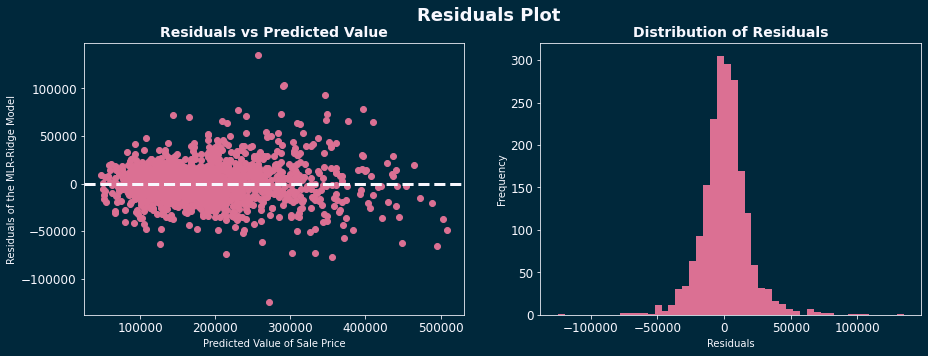

In [105]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize = (15,5))
fig.suptitle('Residuals Plot')
ax1.set_title('Residuals vs Predicted Value')
ax1.scatter(np.exp(yz_preds), resids, color = 'palevioletred')
ax1.axhline(y=0, color='ghostwhite', linestyle='--', linewidth=3)
ax1.set_xlabel('Predicted Value of Sale Price', )
ax1.set_ylabel('Residuals of the MLR-Ridge Model')

ax2.set_title('Distribution of Residuals')
ax2.hist(resids, color = 'palevioletred', bins=50)
ax2.set_xlabel('Residuals', )
ax2.set_ylabel('Frequency')
format_fig(fig, 'NoFormatting')
fig.savefig('../imgs/Validating_LINEM_Assumptions_Ridge_Model.png', dpi=100, bbox_inches='tight')





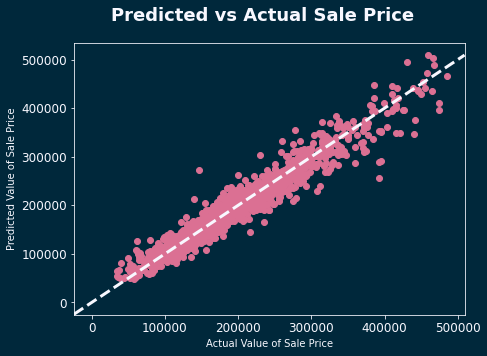

In [106]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, constrained_layout=False, figsize = (7,5))
fig.suptitle('Predicted vs Actual Sale Price')
#ax1.set_title('Residuals vs Predicted Value')
ax1.scatter(yz, np.exp(yz_preds), color = 'palevioletred')
ax1.set_xlabel('Actual Value of Sale Price', )
ax1.set_ylabel('Predicted Value of Sale Price')
ax1.axline([0, 0], [1, 1], color='ghostwhite', linestyle='--', linewidth=3)

format_fig(fig, 'NoFormatting')

fig.savefig('../imgs/Predicted_vs_Actual_SalePrice_Ridge_Model.png', dpi=100, bbox_inches='tight')




In [107]:
pd.DataFrame(ridge_model.coef_, index=Z.columns, columns=['Coeff'])

,Coeff
Total Bsmt SF,0.033889
Gr Liv Area,0.119136
age_when_sold,-0.038133
age_when_remodeled,-0.034702
Porch Total SF,0.016475
...,...
BsmtFin Type 1_2,-0.015886
BsmtFin Type 1_3,0.023503
BsmtFin Type 1_4,0.039443
BsmtFin Type 1_5,-0.025344


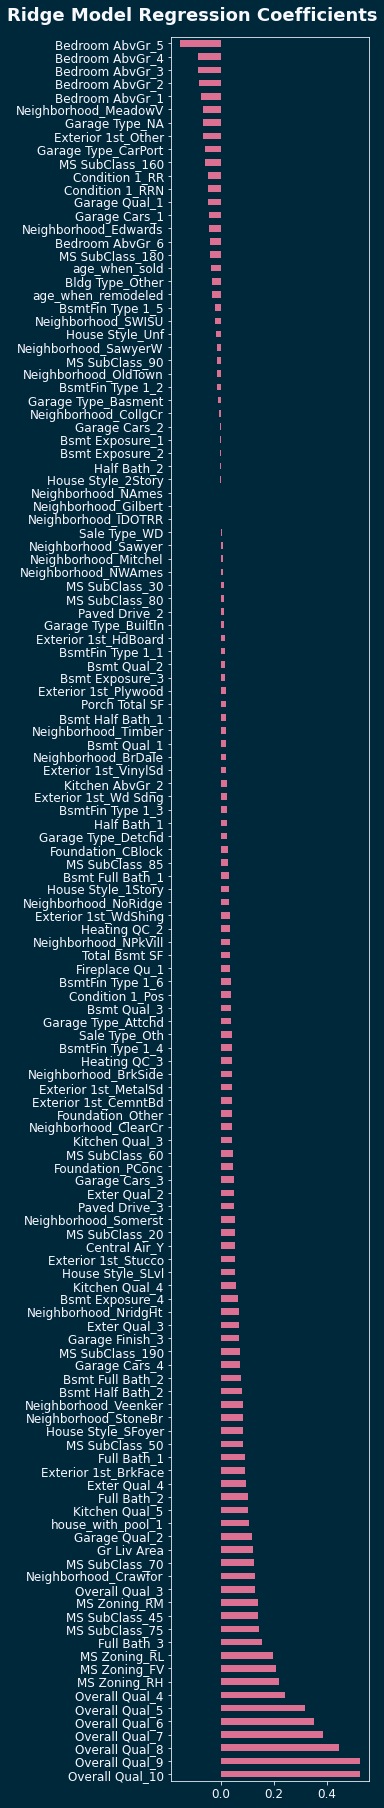

In [108]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize = (5,25))
fig.suptitle('Ridge Model Regression Coefficients')
pd.DataFrame(ridge_model.coef_, index=Z.columns, columns=['Coeff']).sort_values(by=['Coeff'], ascending=False).plot.barh(ax=ax1, facecolor='palevioletred')
lgd = ax1.legend()
lgd.set_visible(False)
format_fig(fig, 'NoFormatting')
fig.savefig('../imgs/Ridge_Model_Regression_Coefficients.png', dpi=dpi, bbox_inches='tight')


